In [1]:
# import necessary libraries for data analyze and visualization 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns

after i run all my Initial EDA functions, i deleted the execution patrs to make my notebook more readable and clear for my Trainer (formateur/rice)

In [2]:
# load test data set 
df_test = pd.read_csv("titanic/test.csv")

In [3]:
# Load and display the data set 
df_train = pd.read_csv("titanic/train.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#######################################      .  Initial EDA  .                 ################################################


In [ ]:
# functoin that : 
# Display basic information about the dataset
#summarise all the statistics we can see all the different metrics 
def display_info(df) :
    print("Display basic information about the dataset :") 
    df.info()
    print("#" * 50)
    print("Display descriptive statistics of the dataset :")
    df.describe()
    return df
display_info(df_test)


In [ ]:
display_info(df_train)

In [ ]:
# count & filter the missing data 
def count_filter(df) : 
    print("total missing data by thier columns :")
# 1. Count missing values per column
    missed_data = df.isna().sum()

# 2. Filter to only columns with at least one missing value
    missing_count = missed_data[missed_data > 0]

    return missing_count
# 3. Display
count_filter(df_test)

In [ ]:
count_filter(df_train)

In [ ]:
# Check for non-logical data in the 'Age' column
# Assuming 'Age' should be a non-negative value and typically less than 100
def non_logic(df) :
    wrong_age = (df['Age'] < 0) | (df['Age'] > 100)

#  How many?
    num_wrong = wrong_age.sum()
    print(f"There are {num_wrong} rows with non‑logical ages.")
    return num_wrong
non_logic(df_train)
#for running the function on the second data set uncomment the function invocation and run it in another cell for more readabilty
#non_logic(df_test) 

In [ ]:
# checking for duplicated values 
def duplicated(df) :
    num_dupes = df.duplicated().sum()
    print(f"There are {num_dupes} duplicate rows.")
    return num_dupes
duplicated(df_train)
#for running the function on the second data set uncomment the function invocation and run it in another cell for more readabilty
#duplicated(df_test)

In [ ]:
# Check the gender values have to be only male and female
# dsplay the count of each gender label

def check_gender_values(df):
    """
    Prints and returns the count of each gender label,
    and verifies that only 'male' and 'female' are present.
    """
    counts = df["Sex"].value_counts()
    print("Gender counts:")

    unique_vals = set(df["Sex"].unique())
    expected = {"male", "female"}
    extra = unique_vals - expected
    missing = expected - unique_vals

    if extra:
        print(f" Unexpected gender values found: {extra}")
    if missing:
        print(f" Missing expected gender values: {missing}")
    if not extra and not missing:
        print(" All gender values are correct (only 'male' and 'female').")

    return counts
check_gender_values(df_train)
#for running the function on the second data set uncomment the function invocation and run it in another cell for more readabilty
#check_gender_values(df_test)

In [ ]:
#Check data types of all columns
def data_types(df) : 
    print("The type of each column in the data set :")
    return df.dtypes
data_types(df_train)
#for running the function on the second data set uncomment the function invocation and run it in another cell for more readabilty
#data_types(df_test)

############################################################ Data Cleaning  ################################################

In [ ]:
# display train Data columns with missing values
count_filter(df_train)

total missing data by thier columns :


Age         177
Cabin       687
Embarked      2
dtype: int64

In [ ]:
# display test Data columns with missing values
count_filter(df_train)

total missing data by thier columns :


Age         177
Cabin       687
Embarked      2
dtype: int64

In [13]:
# Create copies of DataFrames to avoid modifying original data
df_train_imputed = df_train.copy()
df_test_imputed = df_test.copy()

In [14]:
def age_impute(df):
    """
    Returns a copy of df where missing Age values have been
    replaced by the mean Age of passengers with the same Sex and Pclass.
    """
    # compute group means
    group_means = df.groupby(['Sex', 'Pclass'])['Age'].transform('mean')
    # fill missing ages
    df['Age'] = df['Age'].fillna(group_means)
    return df
# run it :
df_train_imputed = age_impute(df_train_imputed)
df_test_imputed = age_impute(df_test_imputed)


In [15]:
# Fill missing values in the 'Cabin' column with 'Unknown'
# This is a common practice when dealing with missing categorical data
def impute_cabin(df) : 
        df['Cabin'] = df['Cabin'].fillna('Unknown')
        print("missing values in Cabin column has been replaced by 'Unkown'")
        return df
df_train_imputed = impute_cabin(df_train_imputed)
df_test_imputed = impute_cabin(df_test_imputed)

missing values in Cabin column has been replaced by 'Unkown'
missing values in Cabin column has been replaced by 'Unkown'


In [16]:
df_train_imputed['Cabin'].isnull().sum()

np.int64(0)

In [17]:
# check the most common value in the 'Embarked' column
#fill missing values in the 'Embarked' column with the most common value
def impute_embarked(df) : 
    most_common_embarked = df['Embarked'].mode()[0]
    df['Embarked'].fillna(most_common_embarked)
    return df

df_train_imputed = impute_embarked(df_train_imputed)
df_test_imputed = impute_embarked(df_test_imputed)

####################################### Feature Engineering  ############################################################

In [18]:
# create a new column for passengers traveling alone
def alone(df) :
    df['Alone'] = (df['SibSp'] + df['Parch']) == 0
    return df
df_train_imputed = alone(df_train_imputed)
df_test_imputed = alone(df_test_imputed)

In [19]:
# Extracting social titles (Mr, Miss, Mrs, etc.) from the 'Name' column
def title(df) :
    df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
    #print(df['Title'].unique())

# Replace rare titles with 'Rare'
    rare_titles = ['Dr', 'Rev', 'Col', 'Major', 'Capt', 'Lady', 'Countess', 'Jonkheer', 'Don', 'Sir']
    df['Title'] = df['Title'].replace(rare_titles, 'Rare')

    #Merge duplicate nicknames with the same meaning
    df['Title'] = df['Title'].replace({
        'Mlle': 'Miss',
        'Ms': 'Miss',
        'Mme': 'Mrs'
    })
    
    return df
df_train_imputed = title(df_train_imputed)
df_test_imputed = title(df_test_imputed)

In [20]:
# Create a new column 'IsChild' to indicate if a passenger is a child (Age < 16)
def is_child(df):
    df['IsChild'] = df['Age'] < 16
    return df
df_train_imputed = is_child(df_train_imputed)
df_test_imputed = is_child(df_test_imputed)

In [21]:
#Divide passengers into age group
def age_group(df):
    bins = [0, 12, 17, 35, 55, 100]
    labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']

    df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)
    return df 
df_train_imputed = age_group(df_train_imputed)
df_test_imputed = age_group(df_test_imputed)

########################################################### Analysis & Visualization ##########################################################################

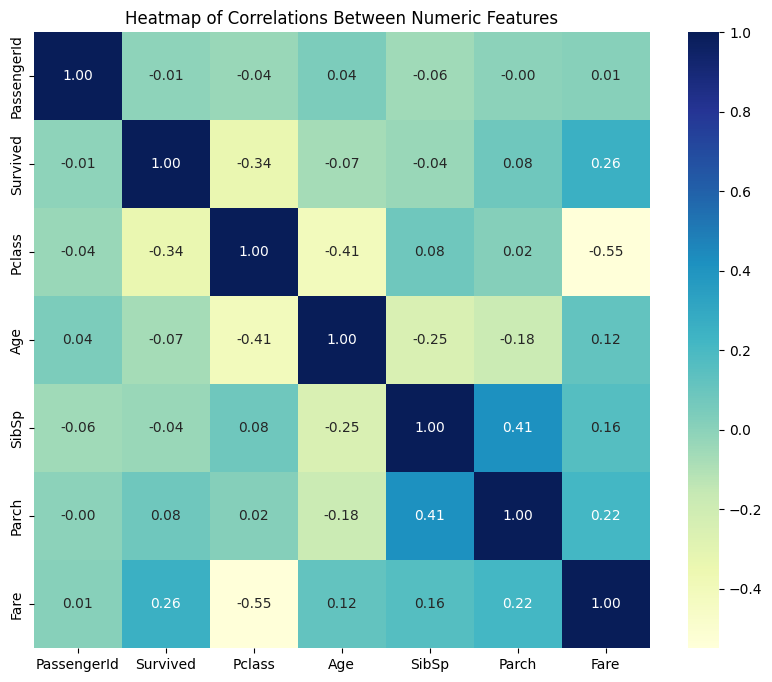

In [22]:
# 1) Select only numeric columns
numeric_df = df_train_imputed.select_dtypes(include=['number'])

# 2) Compute the correlation matrix
corr_matrix = numeric_df.corr()

# 3) Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    cmap="YlGnBu",   # color palette
    annot=True,      # show correlation values on the cells
    fmt=".2f",       # two decimal places
    square=True      # make cells square-shaped
)
plt.title("Heatmap of Correlations Between Numeric Features")
plt.show()


In [31]:
# How many passengers survived compared to those who perished

survival_counts = df_train_imputed['Survived'].value_counts()
# Visualizing the survival distribution
px.pie(survival_counts, names=survival_counts.index, values=survival_counts.values,
       title="General Survival Distribution Amonge passengers ",
       color_discrete_sequence=["red", "green"],
       labels={"Survived": "Survival Status"},
       hole=0.3).show() 

In [23]:
# % of women who survived 
women = df_train_imputed.loc[df_train_imputed.Sex == 'female']["Survived"]
rate_women = sum(women) / len(women) * 100
print(f"{rate_women:.2f}% of women who survived")

# Visualizing the survival distribution Among Women
women_data = df_train_imputed[df_train_imputed.Sex == "female"]
counts = women_data["Survived"].value_counts().reset_index()
counts.columns = ["Survived", "Count"]
counts["Status"] = counts["Survived"].map({0: "Did not survive", 1: "Survived"})

fig = px.pie(counts, names="Status", values="Count", 
         title="Survival Distribution Among Women",
         color_discrete_sequence=["green", "red"])
fig.show()


74.20% of women who survived


In [26]:
# % of men who survived
men = df_train_imputed.loc[df_train_imputed.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)
rate_men *= 100
print(f"{rate_men:.2F}% of men who survived")

# Visualizing the survival distribution Among Men
men_data = df_train_imputed[df_train_imputed.Sex == "male"]
counts = men_data["Survived"].value_counts().reset_index()
counts.columns = ["Survived", "Count"]
counts["Status"] = counts["Survived"].map({0: "Did not survive", 1: "Survived"})

fig = px.pie(counts, names="Status", values="Count", 
            title="Survival Distribution Among Men",
            color_discrete_sequence=["red", "green"])
fig.show()

18.89% of men who survived


In [42]:
# Calculate the survival rate for Age groups
group_survival_rate = df_train_imputed.groupby('AgeGroup', observed=False)['Survived'].mean() * 100

# Prepare data for plotly
df_rates = group_survival_rate.reset_index()
df_rates.columns = ['Group', 'SurvivalRate']

# Create a bar chart with Plotly Express
fig = px.bar(
    df_rates,
    x='Group',
    y='SurvivalRate',
    title='Survival Rate by Age Group',
    labels={'SurvivalRate': 'Survival Rate (%)', 'Group': 'Age Group'},
    text=df_rates['SurvivalRate'].round(2)  # show values on bars
)

# Enhance display: adjust text position and hover template
fig.update_traces(
    textposition='outside',
    hovertemplate='Age Group: %{x}<br>Survival Rate: %{y:.2f}%'
)

# Customize layout for better readability
fig.update_layout(
    yaxis=dict(range=[0, df_rates['SurvivalRate'].max() + 10]),
    uniformtext_minsize=8,
    uniformtext_mode='hide'
)

fig.show()


In [29]:
# Count how many of them survived vs did not survive
free_fares = df_train_imputed[df_train_imputed["Fare"] <= 0]

counts = free_fares["Survived"].value_counts().reset_index()
counts.columns = ["Survived", "Count"]  # Rename columns
counts["Status"] = counts["Survived"].map({0: "Did not survive", 1: "Survived"})  # Map status for labels

# Create a pie chart using plotly express
fig = px.pie(counts, names="Status", values="Count", 
             title="Survival Among Passengers with Free Tickets",
             color_discrete_sequence=["red", "green"]) 

fig.show()

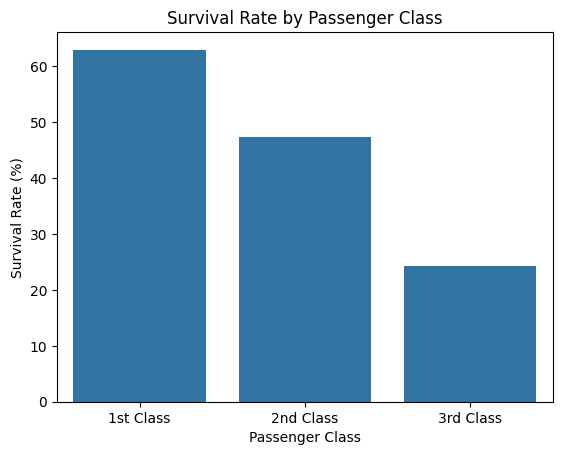

In [43]:
# Calculate the survival rate for each passenger class
pclass_survival_rate = df_train_imputed.groupby('Pclass')['Survived'].mean() * 100

# Visualizing the survival rate by passenger class
sns.barplot(x=pclass_survival_rate.index, y=pclass_survival_rate.values)
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate (%)")
plt.xticks([0, 1, 2], ['1st Class', '2nd Class', '3rd Class'])
plt.show()

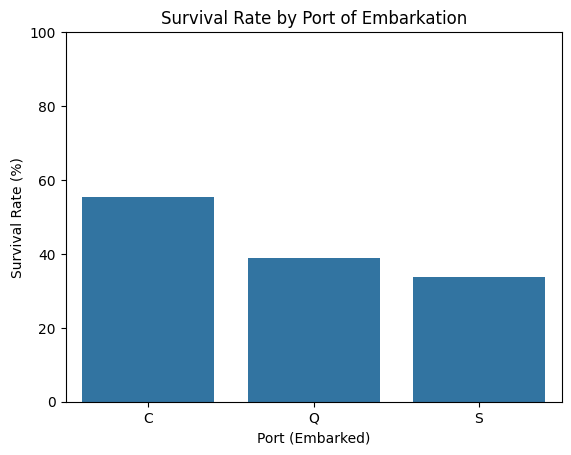

In [45]:
# the average survival rate by embarkation port
embarked_survival = df_train_imputed.groupby('Embarked')['Survived'].mean() * 100
#print(embarked_survival)

# Visualizing the survival rate by embarkation port
sns.barplot(x=embarked_survival.index, y=embarked_survival.values)
plt.title("Survival Rate by Port of Embarkation")
plt.xlabel("Port (Embarked)")
plt.ylabel("Survival Rate (%)")
plt.ylim(0, 100)
plt.show()

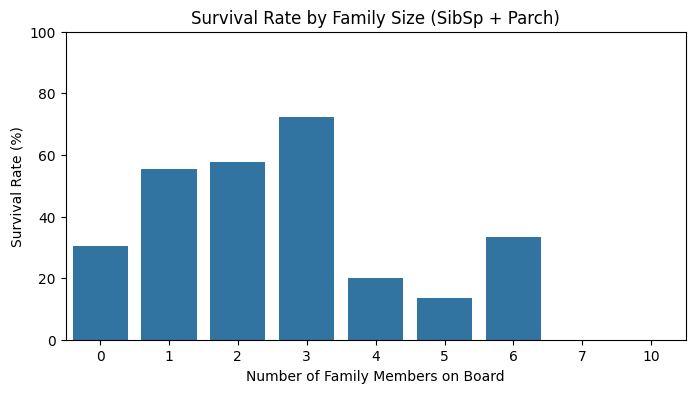

In [46]:
# On-the-fly calculation of family size without modifying the original DataFrame
group_series = df_train_imputed['SibSp'] + df_train_imputed['Parch']

# Calculate the survival rate by family size
after_group = (
    df_train_imputed
    .groupby(group_series)['Survived']
    .mean() * 100
)

# Visualizing the survival rate by family size
plt.figure(figsize=(8, 4))
sns.barplot(x=after_group.index, y=after_group.values)
plt.title("Survival Rate by Family Size (SibSp + Parch)")
plt.xlabel("Number of Family Members on Board")
plt.ylabel("Survival Rate (%)")
plt.ylim(0, 100)
plt.show()


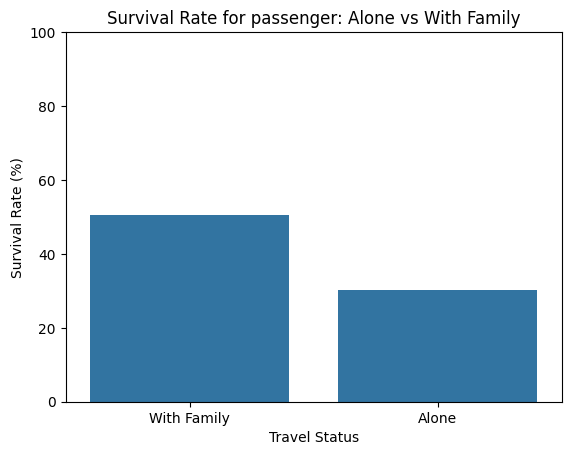

In [54]:
# Calculate the survival rate for passengers who traveled alone
alone_survival_rate = df_train_imputed.groupby('Alone')['Survived'].mean() * 100

# Visualizing the survival rate for passengers who traveled alone
sns.barplot(x=alone_survival_rate.index.map({True: 'Alone', False: 'With Family'}),
            y=alone_survival_rate.values)
plt.title("Survival Rate for passenger: Alone vs With Family")
plt.xlabel("Travel Status")
plt.ylabel("Survival Rate (%)")
plt.ylim(0, 100)
plt.show()

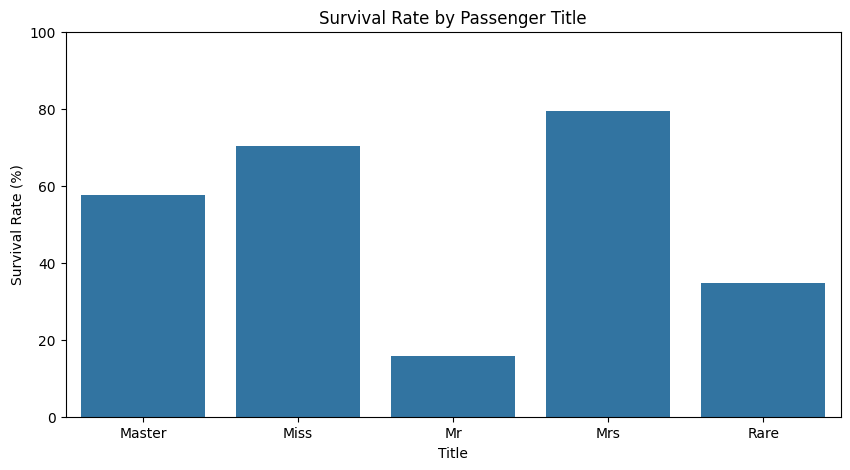

In [56]:
# Calculate the survival rate for each title
title_survival = df_train_imputed.groupby('Title')['Survived'].mean() * 100
#print(title_survival.sort_values(ascending=False))

# Visualizing the survival rate by passenger title
plt.figure(figsize=(10, 5))
sns.barplot(x=title_survival.index, y=title_survival.values)
plt.title("Survival Rate by Passenger Title")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Title")
plt.ylim(0, 100)
plt.show()

#################################################### Modeling & Evaluation ####################################################

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, classification_report


# loop through the columns to encode categorical variables
# Create separate encoders for each column
for col in ["Sex", "Embarked", "Title", "AgeGroup"]:
    le = LabelEncoder()
    df_train_imputed[col] = le.fit_transform(df_train_imputed[col])
for col in ["Sex", "Embarked", "Title", "AgeGroup"]:
    le = LabelEncoder()
    df_test_imputed[col] = le.fit_transform(df_test_imputed[col])


#  select features
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "Title", "Alone", "IsChild", "AgeGroup"]
X = df_train_imputed[features]
y = df_train_imputed["Survived"]
X_test = df_test_imputed[features]

#split the data into training and validation sets
# 80% of data for training and 20% of data for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# random forest model with the best parameters after testing many different values for the parameters 
# and comparing 4 models
model = RandomForestClassifier(
n_estimators=433,
max_depth=69,
max_features=0.8594986214724638,
min_samples_split=14,
random_state=42
)
model.fit(X_train, y_train)

# # Make predictions on the test set
predictions = model.predict(X_test)
# # Align columns of X_test to X (fill missing columns with 0)
# X_test = X_test.reindex(columns=X.columns, fill_value=0)        
# # Save the predictions to a CSV file
# submission = pd.DataFrame({
#      "PassengerId": test_data["PassengerId"],
#      "Survived": predictions
#  })
# submission.to_csv("submission_test_V2.csv", index=False)        
# print("Your submission was successfully saved!")
# # Display the first few rows of the submission DataFrame
# submission.head()

# 1. Using the model’s built‑in .score() on your validation set:
val_accuracy = model.score(X_val, y_val)
print(f"Validation Accuracy (model.score): {val_accuracy:.2%}")


# 2. Using accuracy_score explicitly:
y_val_pred = model.predict(X_val)
acc = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy (accuracy_score): {acc:.2%}")

# (Optional) A full classification report for precision/recall/F1:
print("\nClassification Report:\n")
print(classification_report(y_val, y_val_pred, target_names=["Did Not Survive", "Survived"]))



Validation Accuracy (model.score): 81.01%
Validation Accuracy (accuracy_score): 81.01%

Classification Report:

                 precision    recall  f1-score   support

Did Not Survive       0.80      0.90      0.85       105
       Survived       0.82      0.69      0.75        74

       accuracy                           0.81       179
      macro avg       0.81      0.79      0.80       179
   weighted avg       0.81      0.81      0.81       179



The model gets 81% overall accuracy. It’s very good at spotting non‑survivors (90% recall) but only catches 69% of true survivors (so it misses about 31% of them).

I tested four models together—including a RandomForestClassifier—without digging into how they work or tuning their parameters. The sole purpose was to compare their performance (accuracy, scores, etc.). I haven’t shared the code because I didn’t write it myself.
==================================================
 and the results of training and comparing models were : 

Training RandomForest...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best CV AUC for RandomForest: 0.8844

Training GradientBoosting...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best CV AUC for GradientBoosting: 0.8892

Training LogisticRegression...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best CV AUC for LogisticRegression: 0.8598

Training SVM...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best CV AUC for SVM: 0.8662

Best model: GradientBoosting
Best CV AUC: 0.8892

==================================================
TEST SET EVALUATION
==================================================
Test Accuracy: 0.8324
Test AUC: 0.8354

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       110
           1       0.82      0.72      0.77        69

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179


Confusion Matrix:
[[99 11]
 [19 50]]

Top 10 Most Important Features:
 1. Fare                : 0.3176
 2. Group_Man           : 0.2178
 3. Title_2             : 0.1525
 4. Age                 : 0.1418
 5. Pclass              : 0.1394
 6. Sex_1               : 0.0309

Cross-validation scores: [0.82517483 0.81818182 0.87323944 0.83098592 0.85211268]
Mean CV accuracy: 0.8399 (+/- 0.0403)

==================================================
MODEL COMPARISON SUMMARY
==================================================
GradientBoosting    : 0.8892
RandomForest        : 0.8844
SVM                 : 0.8662
LogisticRegression  : 0.8598